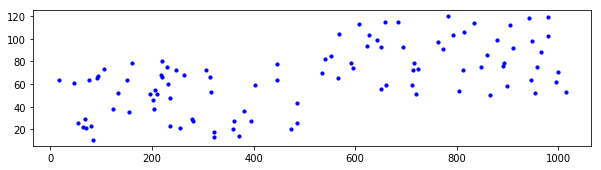

In [113]:
# 构建数据集
n_samples = 50  # 数据集大小

import random
cluster_a = [(random.randint(10,500), random.randint(10, 80)) for i in range(n_samples)]     # a 类数据
cluster_b = [(random.randint(520,1020), random.randint(50, 120)) for i in range(n_samples)]  # b 类数据

# 可视化初始数据
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 2.5))  # 设置画布大小
plt.subplot("111")
X = cluster_a + cluster_b
plt.scatter([x[0] for x in X], [x[1] for x in X], c="b", s=10)

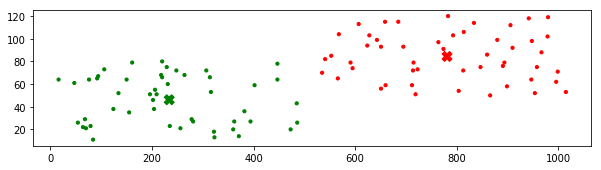

In [114]:
# 使用 sklearn.cluster 工具完成聚类  ##
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init="k-means++")
result = kmeans.fit_predict(X)  # 训练聚类模型并完成聚类
centers = kmeans.cluster_centers_  # 类别中心点（有的出处称其为质心）

# 可视化聚类结果
colors = ["red", "green"]
plt.figure(figsize=(10, 2.5))  # 设置画布大小
plt.subplot("111")
plt.scatter([x[0] for x in X], [x[1] for x in X], c=[colors[x] for x in result], s=10)
plt.scatter([x[0] for x in centers], [x[1] for x in centers], c=colors, marker="X", s=100)

In [ ]:
## 根据聚类原理实现聚类算法  ##

End at iteration: 3


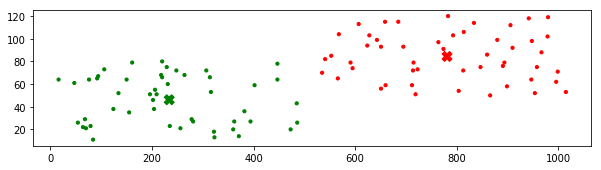

In [115]:
# 代码一
# 质心初始化为数据集中的任两个数据点
# 只绘制最后结果

# [centers_a, centers_b] = [random.choice(X) for x in range(2)]  # 初始化质心，此处在数据集中随机选两个质心
[centers_a, centers_b] = [(random.randint(10,1020), random.randint(10, 120)) for x in range(2)]  # 初始化质心，此处在一定范围内随机选两个点

max_iteration = 300  # 最大迭代次数
clusters = []  # 保存聚类结果
for i in range(max_iteration):
    distance_a = [(x[0]-centers_a[0])**2+(x[1]-centers_a[1])**2 for x in X]  # 计算各点到质心 a 的距离
    distance_b = [(x[0]-centers_b[0])**2+(x[1]-centers_b[1])**2 for x in X]  # 计算各点到质心 b 的距离
    clusters = [0 if dis[0] < dis[1] else 1 for dis in zip(distance_a, distance_b)]  # 根据距离归类，距离 a 近为 0，否则为 1
    # 根据归类结果划分数据
    predict_a = []
    predict_b = []
    for index, x in enumerate(X):
        if clusters[index] == 0:
            predict_a.append(x)
        else:
            predict_b.append(x)
    # 重新计算质心
    temp_a = (sum([x[0] for x in predict_a])/len(predict_a), sum([x[1] for x in predict_a])/len(predict_a))
    temp_b = (sum([x[0] for x in predict_b])/len(predict_b), sum([x[1] for x in predict_b])/len(predict_b))
    if temp_a == centers_a and temp_b == centers_b:  # 质心不再变化
        print("End at iteration:", i)
        break
    else:
        centers_a = temp_a
        centers_b = temp_b

# 可视化聚类结果
plt.figure(figsize=(10, 2.5))  # 设置画布大小
colors = ["red", "green"]
centers = [centers_a, centers_b]
plt.subplot("111")
plt.scatter([x[0] for x in X], [x[1] for x in X], c=[colors[x] for x in clusters], s=10)
plt.scatter([x[0] for x in centers], [x[1] for x in centers], c=colors, marker="X", s=100)

End at iteration: 4


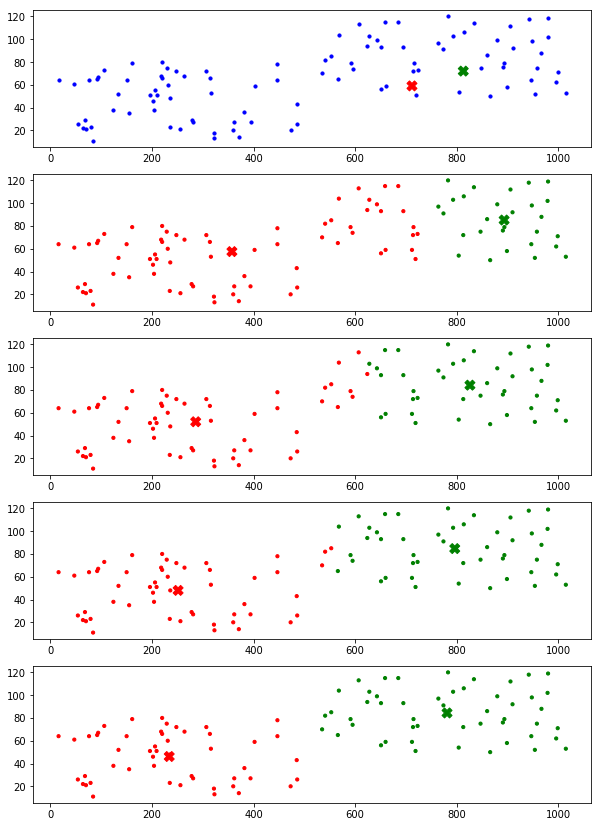

In [128]:
# 代码二
# 质心初始化为数据集中的任两个数据点
# 展示每一步结果

[centers_a, centers_b] = [random.choice(X) for x in range(2)]  # 初始化质心，此处在数据集中随机选两个质心
# [centers_a, centers_b] = [(random.randint(10,1020), random.randint(10, 120)) for x in range(2)]  # 初始化质心，此处在一定范围内随机选两个点


max_iteration = 30  # 最大迭代次数
clusters = []  # 保存聚类结果
plt.figure(figsize=(10, max_iteration*3))  # 设置画布大小
colors = ["red", "green"]

# 绘制初始情况
plt.subplot(max_iteration, 1, 1)
centers = [centers_a, centers_b]
plt.scatter([x[0] for x in X], [x[1] for x in X], c='b', s=10)
plt.scatter([x[0] for x in centers], [x[1] for x in centers], c=colors, marker="X", s=100)

for i in range(max_iteration):
    distance_a = [(x[0]-centers_a[0])**2+(x[1]-centers_a[1])**2 for x in X]  # 计算各点到质心 a 的距离
    distance_b = [(x[0]-centers_b[0])**2+(x[1]-centers_b[1])**2 for x in X]  # 计算各点到质心 b 的距离
    clusters = [0 if dis[0] < dis[1] else 1 for dis in zip(distance_a, distance_b)]  # 根据距离归类，距离 a 近为 0，否则为 1
    # 根据归类结果划分数据
    predict_a = []
    predict_b = []
    for index, x in enumerate(X):
        if clusters[index] == 0:
            predict_a.append(x)
        else:
            predict_b.append(x)
    # 重新计算质心
    if len(predict_a) != 0:  # 在一定范围内随机取点时，可能出现全部被划分为同一类的情况，此时另一类为空，需保证下式除数不为零
        temp_a = (sum([x[0] for x in predict_a])/len(predict_a), sum([x[1] for x in predict_a])/len(predict_a))
    if len(predict_b) != 0:
        temp_b = (sum([x[0] for x in predict_b])/len(predict_b), sum([x[1] for x in predict_b])/len(predict_b))

    if temp_a == centers_a and temp_b == centers_b:  # 质心不再变化
        print("End at iteration:", i)
        break
    else:
        centers_a = temp_a
        centers_b = temp_b
    
    # 可视化每次的聚类结果
    centers = [centers_a, centers_b]
    plt.subplot(max_iteration, 1, i+2)
    plt.scatter([x[0] for x in X], [x[1] for x in X], c=[colors[x] for x in clusters], s=10)
    plt.scatter([x[0] for x in centers], [x[1] for x in centers], c=colors, marker="X", s=100)

End at iteration: 4


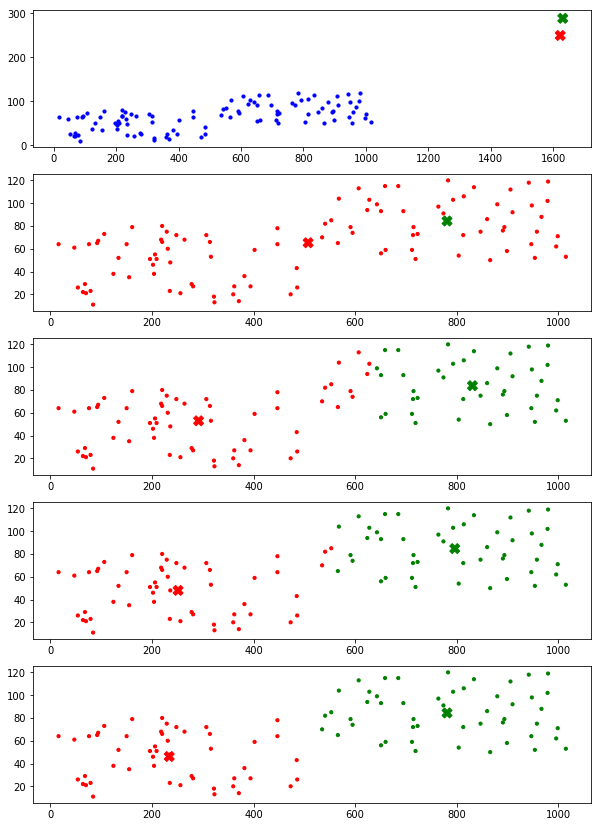

In [131]:
# 代码三
# 质心初始化为一定范围内的任两个点
# 展示每一步结果

# [centers_a, centers_b] = [random.choice(X) for x in range(2)]  # 初始化质心，此处在数据集中随机选两个质心
[centers_a, centers_b] = [(random.randint(0,2000), random.randint(0, 300)) for x in range(2)]  # 初始化质心，此处在一定范围内随机选两个点

max_iteration = 30  # 最大迭代次数
clusters = []  # 保存聚类结果
plt.figure(figsize=(10, max_iteration*3))  # 设置画布大小
colors = ["red", "green"]

# 绘制初始情况
plt.subplot(max_iteration, 1, 1)
centers = [centers_a, centers_b]
plt.scatter([x[0] for x in X], [x[1] for x in X], c='b', s=10)
plt.scatter([x[0] for x in centers], [x[1] for x in centers], c=colors, marker="X", s=100)

for i in range(max_iteration):
    distance_a = [(x[0]-centers_a[0])**2+(x[1]-centers_a[1])**2 for x in X]  # 计算各点到质心 a 的距离
    distance_b = [(x[0]-centers_b[0])**2+(x[1]-centers_b[1])**2 for x in X]  # 计算各点到质心 b 的距离
    clusters = [0 if dis[0] < dis[1] else 1 for dis in zip(distance_a, distance_b)]  # 根据距离归类，距离 a 近为 0，否则为 1
    # 根据归类结果划分数据
    predict_a = []
    predict_b = []
    for index, x in enumerate(X):
        if clusters[index] == 0:
            predict_a.append(x)
        else:
            predict_b.append(x)
    # 重新计算质心
    if len(predict_a) != 0:  # 在一定范围内随机取点时，可能出现全部被划分为同一类的情况，此时另一类为空，需保证下式除数不为零
        temp_a = (sum([x[0] for x in predict_a])/len(predict_a), sum([x[1] for x in predict_a])/len(predict_a))
    if len(predict_b) != 0:
        temp_b = (sum([x[0] for x in predict_b])/len(predict_b), sum([x[1] for x in predict_b])/len(predict_b))

    if temp_a == centers_a and temp_b == centers_b:  # 质心不再变化
        print("End at iteration:", i)
        break
    else:
        centers_a = temp_a
        centers_b = temp_b
    
    # 可视化每次的聚类结果
    centers = [centers_a, centers_b]
    plt.subplot(max_iteration, 1, i+2)
    plt.scatter([x[0] for x in X], [x[1] for x in X], c=[colors[x] for x in clusters], s=10)
    plt.scatter([x[0] for x in centers], [x[1] for x in centers], c=colors, marker="X", s=100)